In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
enem_train = pd.read_csv('train.csv')

In [3]:
enem_test = pd.read_csv('test.csv')

In [4]:
total = enem_train.isnull().sum().sort_values(ascending=False)
percent = (enem_train.isnull().sum()/enem_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head()

,Total,Percent
CO_UF_ENTIDADE_CERTIFICACAO,12092,0.880699
NO_ENTIDADE_CERTIFICACAO,12092,0.880699
SG_UF_ENTIDADE_CERTIFICACAO,12092,0.880699
Q041,10792,0.786016
TP_SIT_FUNC_ESC,9448,0.688128


In [5]:
enem_train = enem_train.drop(enem_train.loc[enem_train['NU_NOTA_MT'].isnull()].index)

In [6]:
enem_train['NU_NOTA_MT'].describe()

count    10133.000000
mean       482.497928
std         99.826323
min          0.000000
25%        408.900000
50%        461.200000
75%        537.600000
max        952.000000
Name: NU_NOTA_MT, dtype: float64

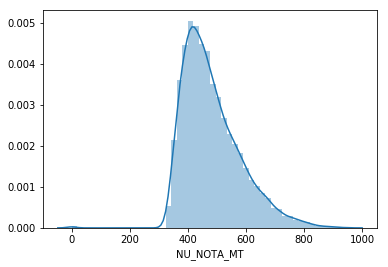

In [7]:
sns.distplot(enem_train['NU_NOTA_MT'])

In [8]:
print("Skewness: %f" % enem_train['NU_NOTA_MT'].skew())
print("Kurtosis: %f" % enem_train['NU_NOTA_MT'].kurt())

Skewness: 0.920690
Kurtosis: 1.422503


In [9]:
enem_train = enem_train[['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',  'NU_NOTA_MT', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047']]

In [10]:
sex = pd.get_dummies(enem_train['TP_SEXO'],drop_first=True)
enem_train = pd.concat([enem_train,sex],axis =1)
enem_train.drop(['TP_SEXO'],axis=1,inplace=True)

In [11]:
enem_train.corr().iloc[0:,24:25].sort_values(by='NU_NOTA_MT', ascending=False)

,NU_NOTA_MT
NU_NOTA_MT,1.000000
NU_NOTA_CN,0.584941
NU_NOTA_CH,0.529594
NU_NOTA_LC,0.494695
NU_NOTA_REDACAO,0.379376
TP_DEPENDENCIA_ADM_ESC,0.373233
NU_NOTA_COMP3,0.350307
NU_NOTA_COMP5,0.343337
NU_NOTA_COMP4,0.342282
NU_NOTA_COMP2,0.335638


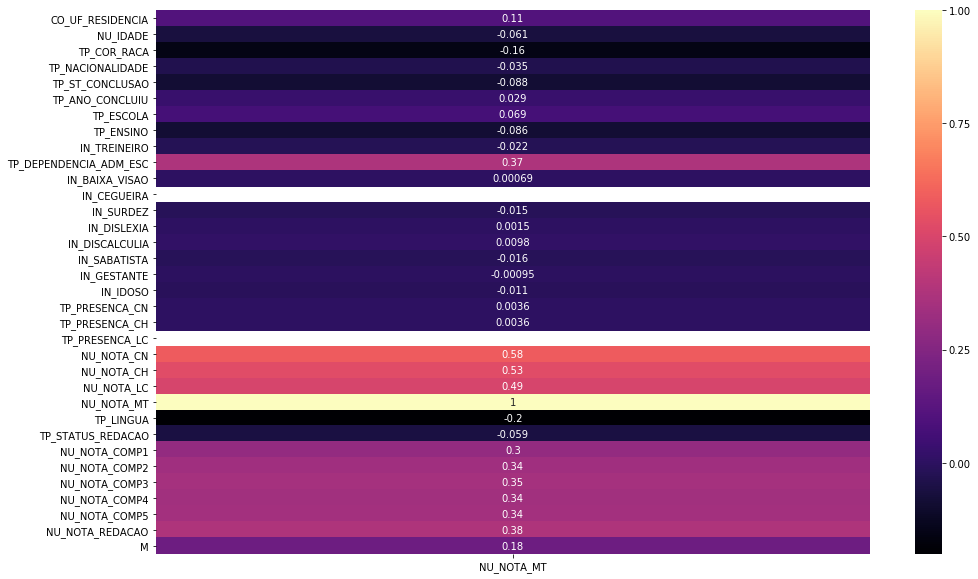

In [12]:
plt.figure(figsize=(16, 10))
sns.heatmap(enem_train.corr().iloc[0:,24:25], cmap='magma', annot=True)

In [13]:
enem_train = enem_train[['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 
       'TP_COR_RACA', 'TP_DEPENDENCIA_ADM_ESC', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',  'NU_NOTA_MT', 'TP_LINGUA', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2',
        'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'TP_ST_CONCLUSAO', 'M', 'TP_ESCOLA',
'TP_ANO_CONCLUIU', 'TP_ST_CONCLUSAO', 'TP_ENSINO', 'NU_IDADE', 'TP_STATUS_REDACAO', 'TP_NACIONALIDADE', 'IN_TREINEIRO']]

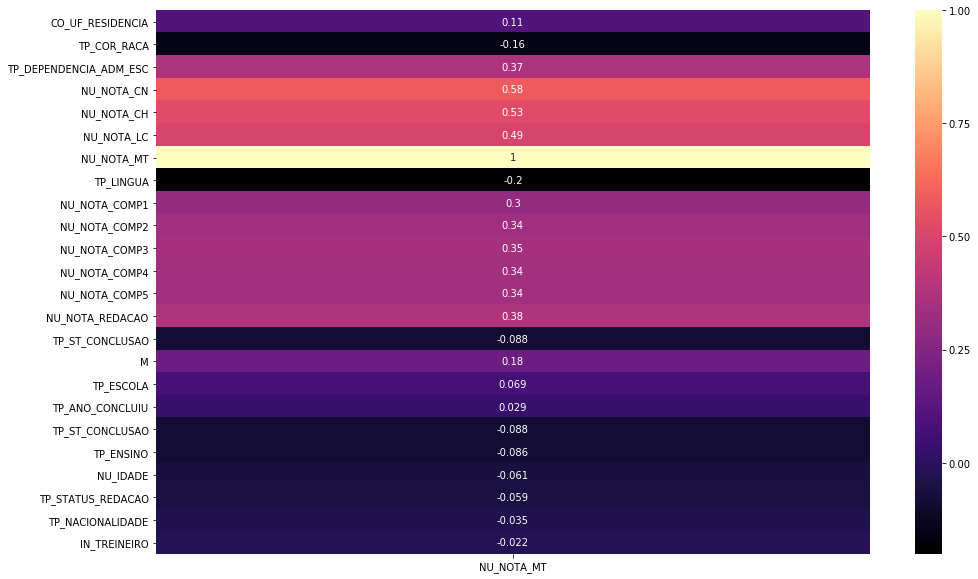

In [14]:
plt.figure(figsize=(16, 10))
sns.heatmap(enem_train.corr().iloc[0:,6:7], cmap='magma', annot=True)

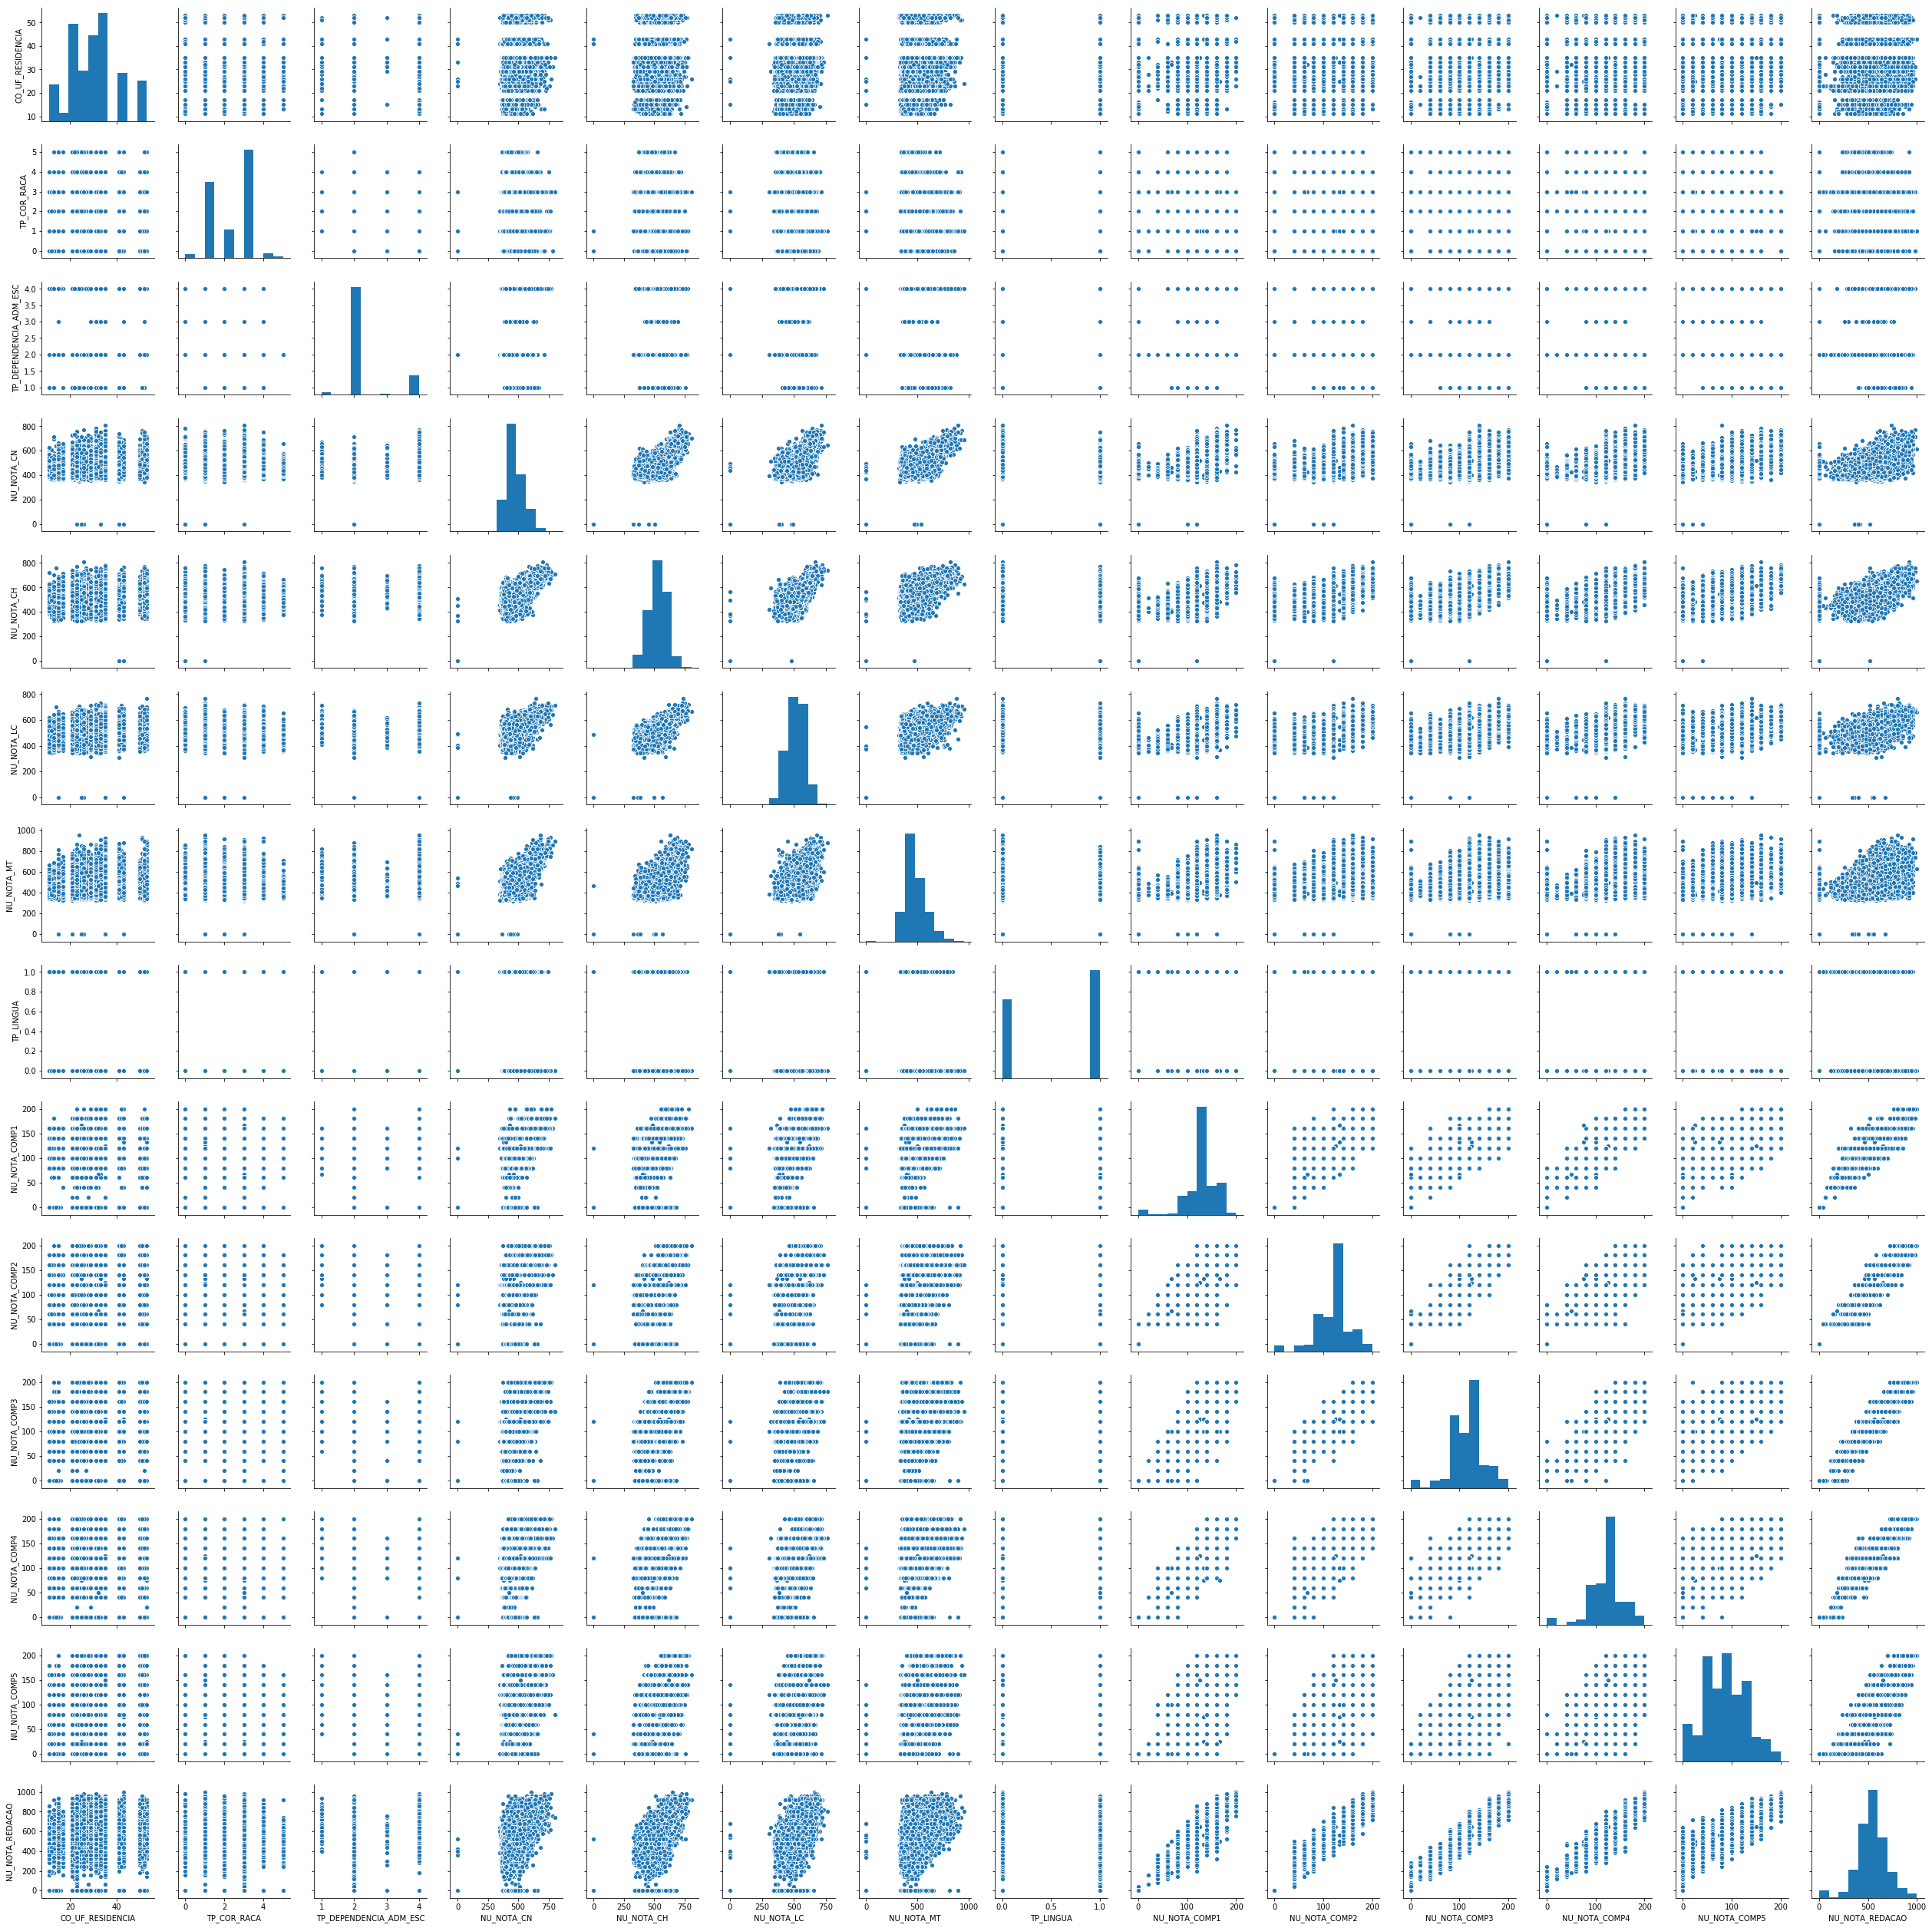

In [141]:
sns.pairplot(enem_train)

In [15]:
enem_train = enem_train[['NU_INSCRICAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',  'NU_NOTA_MT',
        'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO',
        'TP_COR_RACA', 'CO_UF_RESIDENCIA', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LINGUA','TP_ST_CONCLUSAO', 'M',  'TP_ESCOLA',
'TP_ANO_CONCLUIU', 'TP_ST_CONCLUSAO', 'TP_ENSINO', 'NU_IDADE', 'TP_STATUS_REDACAO', 'TP_NACIONALIDADE', 'IN_TREINEIRO']]

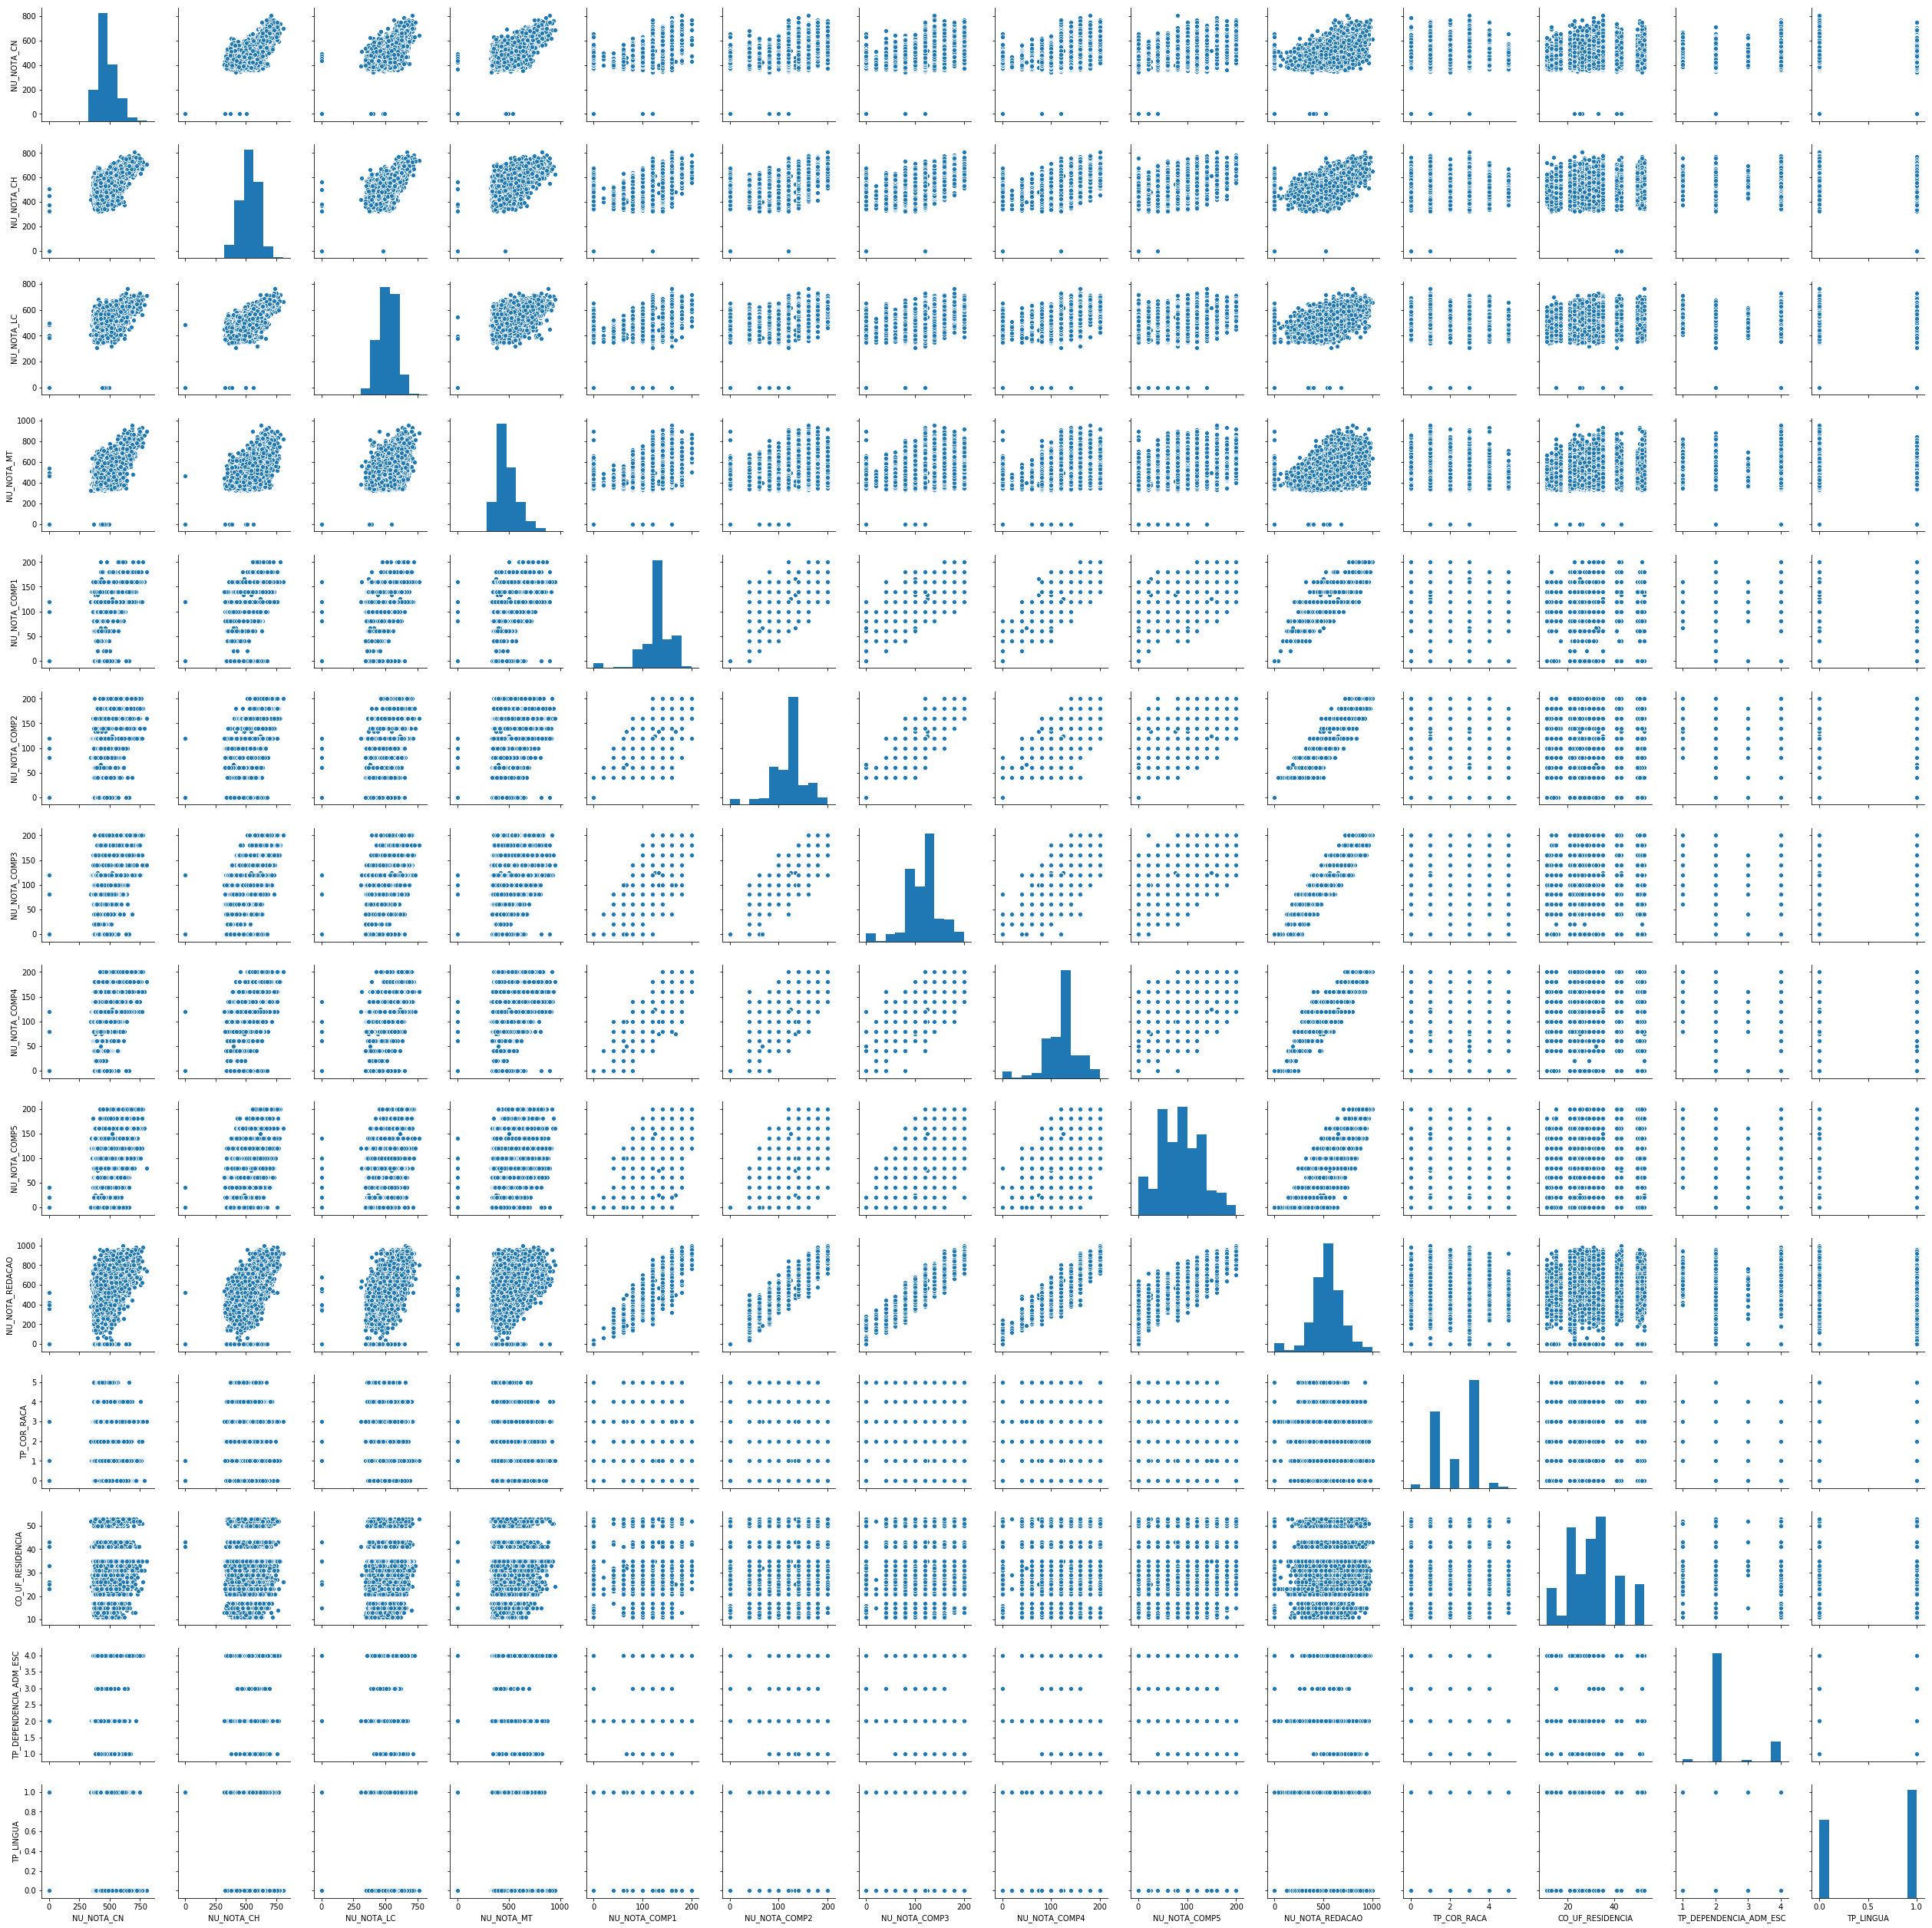

In [406]:
sns.pairplot(enem_train)

In [16]:
enem_train.columns

Index(['NU_INSCRICAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'TP_COR_RACA', 'CO_UF_RESIDENCIA',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LINGUA', 'TP_ST_CONCLUSAO',
       'TP_ST_CONCLUSAO', 'M', 'TP_ESCOLA', 'TP_ANO_CONCLUIU',
       'TP_ST_CONCLUSAO', 'TP_ST_CONCLUSAO', 'TP_ENSINO', 'NU_IDADE',
       'TP_STATUS_REDACAO', 'TP_NACIONALIDADE', 'IN_TREINEIRO'],
      dtype='object')

In [21]:
total = enem_train.isnull().sum().sort_values(ascending=False)
percent = (enem_train.isnull().sum()/enem_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data

,Total,Percent
TP_DEPENDENCIA_ADM_ESC,6494,0.640876
TP_ENSINO,6494,0.640876
NU_NOTA_CN,36,0.003553
NU_NOTA_CH,36,0.003553
CO_UF_RESIDENCIA,0,0.000000
NU_NOTA_LC,0,0.000000
NU_NOTA_MT,0,0.000000
NU_NOTA_COMP1,0,0.000000
NU_NOTA_COMP2,0,0.000000
NU_NOTA_COMP3,0,0.000000


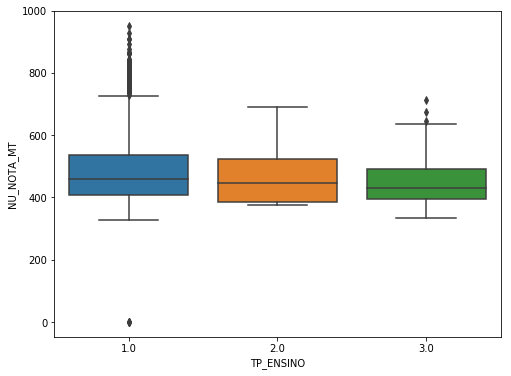

In [18]:
var = 'TP_ENSINO'
data = pd.concat([enem_train['NU_NOTA_MT'], enem_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="NU_NOTA_MT", data=data)
#fig.axis(ymin=0, ymax=800000);

In [22]:
enem_train['TP_ENSINO'].fillna(value=4.0, inplace=True)

In [23]:
enem_train['TP_DEPENDENCIA_ADM_ESC'].fillna(value=2.5, inplace=True)

In [24]:
a = enem_train.groupby(by='TP_DEPENDENCIA_ADM_ESC').mean()['NU_NOTA_MT'].min()
enem_train.groupby(by='TP_DEPENDENCIA_ADM_ESC').mean()['NU_NOTA_MT']/a

TP_DEPENDENCIA_ADM_ESC
1.0    1.243534
2.0    1.000000
3.0    1.042246
4.0    1.252147
Name: NU_NOTA_MT, dtype: float64

In [25]:
enem_train.loc[enem_train['TP_DEPENDENCIA_ADM_ESC'] == 1, 'TP_DEPENDENCIA_ADM_ESC'] = 1.243534
enem_train.loc[enem_train['TP_DEPENDENCIA_ADM_ESC'] == 2, 'TP_DEPENDENCIA_ADM_ESC'] = 1
enem_train.loc[enem_train['TP_DEPENDENCIA_ADM_ESC'] == 2.5, 'TP_DEPENDENCIA_ADM_ESC'] = 1.050648
enem_train.loc[enem_train['TP_DEPENDENCIA_ADM_ESC'] == 3, 'TP_DEPENDENCIA_ADM_ESC'] = 1.042246
enem_train.loc[enem_train['TP_DEPENDENCIA_ADM_ESC'] == 4, 'TP_DEPENDENCIA_ADM_ESC'] = 1.252147
enem_train['TP_DEPENDENCIA_ADM_ESC'].unique()

array([     nan, 1.      , 1.243534, 1.252147, 1.042246])

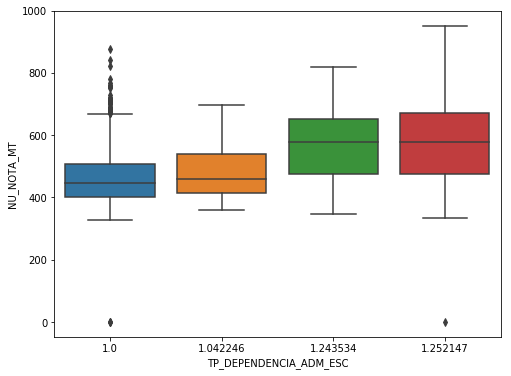

In [26]:
var = 'TP_DEPENDENCIA_ADM_ESC'
data = pd.concat([enem_train['NU_NOTA_MT'], enem_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="NU_NOTA_MT", data=data)
#fig.axis(ymin=0, ymax=800000);

In [27]:
a = enem_train.groupby(by='TP_COR_RACA').mean()['NU_NOTA_MT'].min()
enem_train.groupby(by='TP_COR_RACA').mean()['NU_NOTA_MT']/a

TP_COR_RACA
0    1.087672
1    1.117595
2    1.028834
3    1.032280
4    1.080062
5    1.000000
Name: NU_NOTA_MT, dtype: float64

In [28]:
enem_train.loc[enem_train['TP_COR_RACA'] == 0, 'TP_COR_RACA'] = 1.087672
enem_train.loc[enem_train['TP_COR_RACA'] == 1, 'TP_COR_RACA'] = 1.117595
enem_train.loc[enem_train['TP_COR_RACA'] == 2, 'TP_COR_RACA'] = 1.028834
enem_train.loc[enem_train['TP_COR_RACA'] == 3, 'TP_COR_RACA'] = 1.032280
enem_train.loc[enem_train['TP_COR_RACA'] == 4, 'TP_COR_RACA'] = 1.080062
enem_train.loc[enem_train['TP_COR_RACA'] == 5, 'TP_COR_RACA'] = 1

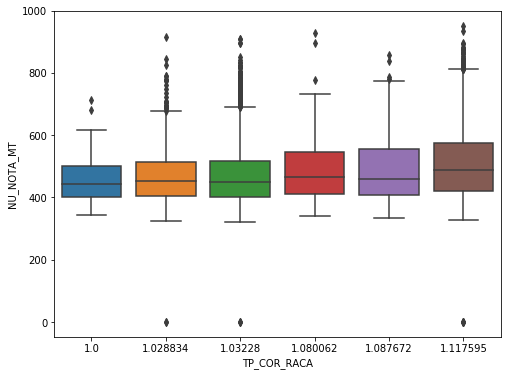

In [29]:
var = 'TP_COR_RACA'
data = pd.concat([enem_train['NU_NOTA_MT'], enem_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="NU_NOTA_MT", data=data)
#fig.axis(ymin=0, ymax=800000);

In [30]:
a = enem_train.groupby(by='CO_UF_RESIDENCIA').mean()['NU_NOTA_MT'].min()
enem_train.groupby(by='CO_UF_RESIDENCIA').mean()['NU_NOTA_MT']/a

CO_UF_RESIDENCIA
11    1.048037
12    1.038100
13    1.033772
14    1.093324
15    1.048253
16    1.000000
17    1.044239
21    1.024950
22    1.028119
23    1.039863
24    1.105421
25    1.056280
26    1.055239
27    1.034356
28    1.076296
29    1.055027
31    1.139545
32    1.080955
33    1.146687
35    1.132794
41    1.102664
42    1.111444
43    1.111876
50    1.063875
51    1.080367
52    1.072077
53    1.147589
Name: NU_NOTA_MT, dtype: float64

In [31]:
enem_train.loc[enem_train['CO_UF_RESIDENCIA'] == 11, 'CO_UF_RESIDENCIA'] = 1.048037
enem_train.loc[enem_train['CO_UF_RESIDENCIA'] == 12, 'CO_UF_RESIDENCIA'] = 1.038100
enem_train.loc[enem_train['CO_UF_RESIDENCIA'] == 13, 'CO_UF_RESIDENCIA'] = 1.033772
enem_train.loc[enem_train['CO_UF_RESIDENCIA'] == 14, 'CO_UF_RESIDENCIA'] = 1.093324
enem_train.loc[enem_train['CO_UF_RESIDENCIA'] == 15, 'CO_UF_RESIDENCIA'] = 1.048253
enem_train.loc[enem_train['CO_UF_RESIDENCIA'] == 16, 'CO_UF_RESIDENCIA'] = 1
enem_train.loc[enem_train['CO_UF_RESIDENCIA'] == 17, 'CO_UF_RESIDENCIA'] = 1.044239
enem_train.loc[enem_train['CO_UF_RESIDENCIA'] == 21, 'CO_UF_RESIDENCIA'] = 1.024950
enem_train.loc[enem_train['CO_UF_RESIDENCIA'] == 22, 'CO_UF_RESIDENCIA'] = 1.028119
enem_train.loc[enem_train['CO_UF_RESIDENCIA'] == 23, 'CO_UF_RESIDENCIA'] = 1.039863
enem_train.loc[enem_train['CO_UF_RESIDENCIA'] == 24, 'CO_UF_RESIDENCIA'] = 1.105421
enem_train.loc[enem_train['CO_UF_RESIDENCIA'] == 25, 'CO_UF_RESIDENCIA'] = 1.056280
enem_train.loc[enem_train['CO_UF_RESIDENCIA'] == 26, 'CO_UF_RESIDENCIA'] = 1.055239
enem_train.loc[enem_train['CO_UF_RESIDENCIA'] == 27, 'CO_UF_RESIDENCIA'] = 1.034356
enem_train.loc[enem_train['CO_UF_RESIDENCIA'] == 28, 'CO_UF_RESIDENCIA'] = 1.076296
enem_train.loc[enem_train['CO_UF_RESIDENCIA'] == 29, 'CO_UF_RESIDENCIA'] = 1.055027
enem_train.loc[enem_train['CO_UF_RESIDENCIA'] == 31, 'CO_UF_RESIDENCIA'] = 1.139545
enem_train.loc[enem_train['CO_UF_RESIDENCIA'] == 32, 'CO_UF_RESIDENCIA'] = 1.080955
enem_train.loc[enem_train['CO_UF_RESIDENCIA'] == 33, 'CO_UF_RESIDENCIA'] = 1.146687
enem_train.loc[enem_train['CO_UF_RESIDENCIA'] == 35, 'CO_UF_RESIDENCIA'] = 1.132794
enem_train.loc[enem_train['CO_UF_RESIDENCIA'] == 41, 'CO_UF_RESIDENCIA'] = 1.102664
enem_train.loc[enem_train['CO_UF_RESIDENCIA'] == 42, 'CO_UF_RESIDENCIA'] = 1.111444
enem_train.loc[enem_train['CO_UF_RESIDENCIA'] == 43, 'CO_UF_RESIDENCIA'] = 1.111876
enem_train.loc[enem_train['CO_UF_RESIDENCIA'] == 50, 'CO_UF_RESIDENCIA'] = 1.063875
enem_train.loc[enem_train['CO_UF_RESIDENCIA'] == 51, 'CO_UF_RESIDENCIA'] = 1.080367
enem_train.loc[enem_train['CO_UF_RESIDENCIA'] == 52, 'CO_UF_RESIDENCIA'] = 1.072077
enem_train.loc[enem_train['CO_UF_RESIDENCIA'] == 53, 'CO_UF_RESIDENCIA'] = 1.147589

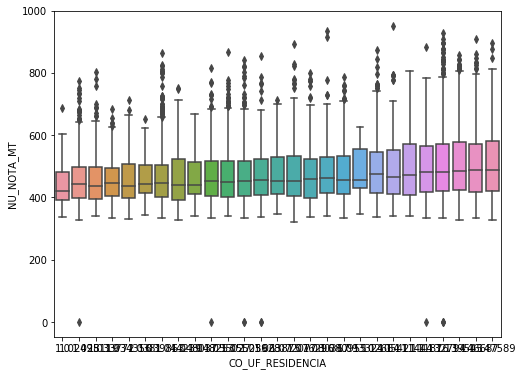

In [32]:
var = 'CO_UF_RESIDENCIA'
data = pd.concat([enem_train['NU_NOTA_MT'], enem_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="NU_NOTA_MT", data=data)
#fig.axis(ymin=0, ymax=800000);

In [33]:
a = enem_train.groupby(by='TP_LINGUA').mean()['NU_NOTA_MT'].min()
enem_train.groupby(by='TP_LINGUA').mean()['NU_NOTA_MT']/a

TP_LINGUA
0    1.087651
1    1.000000
Name: NU_NOTA_MT, dtype: float64

In [34]:
enem_train.loc[enem_train['TP_LINGUA'] == 0, 'TP_LINGUA'] = 1.087651
enem_train.loc[enem_train['TP_LINGUA'] == 1, 'TP_LINGUA'] = 1

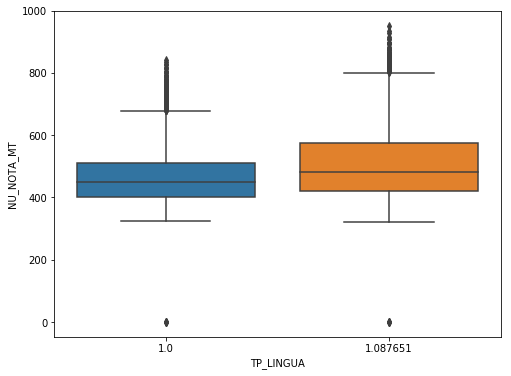

In [35]:
var = 'TP_LINGUA'
data = pd.concat([enem_train['NU_NOTA_MT'], enem_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="NU_NOTA_MT", data=data)
#fig.axis(ymin=0, ymax=800000);

In [36]:
a = enem_train.groupby(by='TP_ST_CONCLUSAO').mean()['NU_NOTA_MT'].min()
enem_train.groupby(by='TP_ST_CONCLUSAO').mean()['NU_NOTA_MT']/a

ValueError: Grouper for 'TP_ST_CONCLUSAO' not 1-dimensional

In [1149]:
#nao mexido

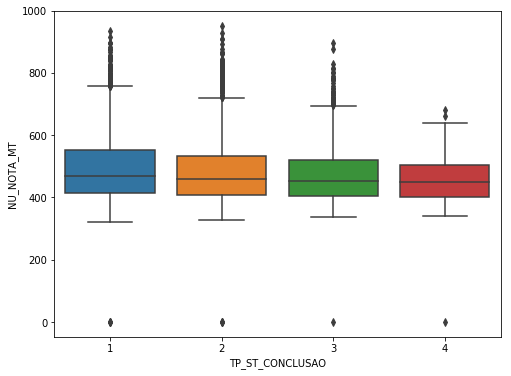

In [1150]:
var = 'TP_ST_CONCLUSAO'
data = pd.concat([enem_train['NU_NOTA_MT'], enem_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="NU_NOTA_MT", data=data)
#fig.axis(ymin=0, ymax=800000);

In [1151]:
total = enem_train.isnull().sum().sort_values(ascending=False)
percent = (enem_train.isnull().sum()/enem_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data

,Total,Percent
NU_NOTA_CN,36,0.003553
NU_NOTA_CH,36,0.003553
M,0,0.000000
NU_NOTA_COMP3,0,0.000000
NU_NOTA_LC,0,0.000000
NU_NOTA_MT,0,0.000000
NU_NOTA_COMP1,0,0.000000
NU_NOTA_COMP2,0,0.000000
NU_NOTA_COMP4,0,0.000000
TP_ST_CONCLUSAO,0,0.000000


In [1152]:
enem_train = enem_train.drop(enem_train.loc[enem_train['NU_NOTA_CH'].isnull()].index)
enem_train = enem_train.drop(enem_train.loc[enem_train['NU_NOTA_CN'].isnull()].index)

In [1153]:
X = enem_train[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
        'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'TP_COR_RACA', 'CO_UF_RESIDENCIA', 'TP_DEPENDENCIA_ADM_ESC',
        'TP_LINGUA', 'TP_ST_CONCLUSAO', 'M']]
y = enem_train['NU_NOTA_MT']

In [1154]:
X.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,TP_COR_RACA,CO_UF_RESIDENCIA,TP_DEPENDENCIA_ADM_ESC,TP_LINGUA,TP_ST_CONCLUSAO,M
0,436.3,495.4,581.2,120.0,120.0,120.0,80.0,80.0,520.0,1.117595,1.111876,1.050648,1.000000,1,1
1,474.5,544.1,599.0,140.0,120.0,120.0,120.0,80.0,580.0,1.032280,1.039863,1.000000,1.000000,2,0
5,439.7,583.2,410.9,120.0,120.0,120.0,160.0,100.0,620.0,1.117595,1.055027,1.050648,1.087651,1,0
6,420.1,604.2,484.5,100.0,120.0,120.0,120.0,100.0,560.0,1.032280,1.080367,1.000000,1.087651,2,0
7,619.6,625.8,611.2,140.0,120.0,120.0,120.0,120.0,620.0,1.117595,1.111876,1.050648,1.087651,1,0


In [1155]:
enem_train = enem_train.drop(enem_train.loc[enem_train['NU_NOTA_MT'] == 0].index)

In [1156]:
from sklearn.model_selection import train_test_split

In [1157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [1158]:
from sklearn.linear_model import LinearRegression

In [1159]:
lm = LinearRegression()

In [1160]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [1161]:
print(lm.intercept_)

-431.5685736187801


In [1162]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
NU_NOTA_CN,0.474419
NU_NOTA_CH,0.224028
NU_NOTA_LC,0.174708
NU_NOTA_COMP1,-0.016659
NU_NOTA_COMP2,-0.019259
NU_NOTA_COMP3,0.018266
NU_NOTA_COMP4,0.019626
NU_NOTA_COMP5,0.024902
NU_NOTA_REDACAO,0.026876
TP_COR_RACA,113.920176


In [1163]:
predictions = lm.predict(X_test)

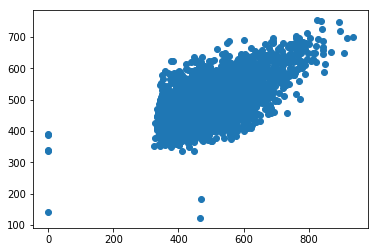

In [1164]:
plt.scatter(y_test,predictions)

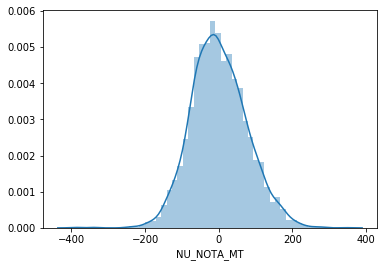

In [1165]:
sns.distplot((y_test-predictions),bins=50)

In [1166]:
from sklearn import metrics

In [1167]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 59.805922153494244
MSE: 5742.224214954239
RMSE: 75.77746508662214


## Versão final!

In [1168]:
enem_test = pd.read_csv('test.csv')

In [1169]:
enem_test = enem_test[['NU_INSCRICAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
        'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'TP_COR_RACA', 'CO_UF_RESIDENCIA', 'TP_DEPENDENCIA_ADM_ESC',
        'TP_LINGUA', 'TP_ST_CONCLUSAO', 'TP_SEXO']]

In [1170]:
sex = pd.get_dummies(enem_test['TP_SEXO'],drop_first=True)
enem_test = pd.concat([enem_test,sex],axis =1)
enem_test.drop(['TP_SEXO'],axis=1,inplace=True)

In [1171]:
total = enem_test.isnull().sum().sort_values(ascending=False)
percent = (enem_test.isnull().sum()/enem_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data

,Total,Percent
TP_DEPENDENCIA_ADM_ESC,3096,0.676573
NU_NOTA_REDACAO,1199,0.262019
NU_NOTA_COMP5,1199,0.262019
NU_NOTA_COMP4,1199,0.262019
NU_NOTA_COMP3,1199,0.262019
NU_NOTA_COMP2,1199,0.262019
NU_NOTA_COMP1,1199,0.262019
NU_NOTA_LC,1199,0.262019
NU_NOTA_CH,1134,0.247815
NU_NOTA_CN,1134,0.247815


In [1172]:
enem_test['TP_DEPENDENCIA_ADM_ESC'].fillna(value=2.5, inplace=True)
enem_test.loc[enem_test['TP_DEPENDENCIA_ADM_ESC'] == 1, 'TP_DEPENDENCIA_ADM_ESC'] = 1.243534
enem_test.loc[enem_test['TP_DEPENDENCIA_ADM_ESC'] == 2, 'TP_DEPENDENCIA_ADM_ESC'] = 1
enem_test.loc[enem_test['TP_DEPENDENCIA_ADM_ESC'] == 2.5, 'TP_DEPENDENCIA_ADM_ESC'] = 1.050648
enem_test.loc[enem_test['TP_DEPENDENCIA_ADM_ESC'] == 3, 'TP_DEPENDENCIA_ADM_ESC'] = 1.042246
enem_test.loc[enem_test['TP_DEPENDENCIA_ADM_ESC'] == 4, 'TP_DEPENDENCIA_ADM_ESC'] = 1.252147
enem_test = enem_test.drop(enem_test.loc[enem_test['NU_NOTA_REDACAO'].isnull()].index)
enem_test = enem_test.drop(enem_test.loc[enem_test['NU_NOTA_COMP5'].isnull()].index)
enem_test = enem_test.drop(enem_test.loc[enem_test['NU_NOTA_COMP4'].isnull()].index)
enem_test = enem_test.drop(enem_test.loc[enem_test['NU_NOTA_COMP3'].isnull()].index)
enem_test = enem_test.drop(enem_test.loc[enem_test['NU_NOTA_COMP2'].isnull()].index)
enem_test = enem_test.drop(enem_test.loc[enem_test['NU_NOTA_COMP1'].isnull()].index)
enem_test = enem_test.drop(enem_test.loc[enem_test['NU_NOTA_LC'].isnull()].index)
enem_test = enem_test.drop(enem_test.loc[enem_test['NU_NOTA_CH'].isnull()].index)
enem_test = enem_test.drop(enem_test.loc[enem_test['NU_NOTA_CN'].isnull()].index)

In [1173]:
enem_test.loc[enem_test['TP_COR_RACA'] == 0, 'TP_COR_RACA'] = 1.087672
enem_test.loc[enem_test['TP_COR_RACA'] == 1, 'TP_COR_RACA'] = 1.117595
enem_test.loc[enem_test['TP_COR_RACA'] == 2, 'TP_COR_RACA'] = 1.028834
enem_test.loc[enem_test['TP_COR_RACA'] == 3, 'TP_COR_RACA'] = 1.032280
enem_test.loc[enem_test['TP_COR_RACA'] == 4, 'TP_COR_RACA'] = 1.080062
enem_test.loc[enem_test['TP_COR_RACA'] == 5, 'TP_COR_RACA'] = 1

In [1174]:
enem_test.loc[enem_test['CO_UF_RESIDENCIA'] == 11, 'CO_UF_RESIDENCIA'] = 1.048037
enem_test.loc[enem_test['CO_UF_RESIDENCIA'] == 12, 'CO_UF_RESIDENCIA'] = 1.038100
enem_test.loc[enem_test['CO_UF_RESIDENCIA'] == 13, 'CO_UF_RESIDENCIA'] = 1.033772
enem_test.loc[enem_test['CO_UF_RESIDENCIA'] == 14, 'CO_UF_RESIDENCIA'] = 1.093324
enem_test.loc[enem_test['CO_UF_RESIDENCIA'] == 15, 'CO_UF_RESIDENCIA'] = 1.048253
enem_test.loc[enem_test['CO_UF_RESIDENCIA'] == 16, 'CO_UF_RESIDENCIA'] = 1
enem_test.loc[enem_test['CO_UF_RESIDENCIA'] == 17, 'CO_UF_RESIDENCIA'] = 1.044239
enem_test.loc[enem_test['CO_UF_RESIDENCIA'] == 21, 'CO_UF_RESIDENCIA'] = 1.024950
enem_test.loc[enem_test['CO_UF_RESIDENCIA'] == 22, 'CO_UF_RESIDENCIA'] = 1.028119
enem_test.loc[enem_test['CO_UF_RESIDENCIA'] == 23, 'CO_UF_RESIDENCIA'] = 1.039863
enem_test.loc[enem_test['CO_UF_RESIDENCIA'] == 24, 'CO_UF_RESIDENCIA'] = 1.105421
enem_test.loc[enem_test['CO_UF_RESIDENCIA'] == 25, 'CO_UF_RESIDENCIA'] = 1.056280
enem_test.loc[enem_test['CO_UF_RESIDENCIA'] == 26, 'CO_UF_RESIDENCIA'] = 1.055239
enem_test.loc[enem_test['CO_UF_RESIDENCIA'] == 27, 'CO_UF_RESIDENCIA'] = 1.034356
enem_test.loc[enem_test['CO_UF_RESIDENCIA'] == 28, 'CO_UF_RESIDENCIA'] = 1.076296
enem_test.loc[enem_test['CO_UF_RESIDENCIA'] == 29, 'CO_UF_RESIDENCIA'] = 1.055027
enem_test.loc[enem_test['CO_UF_RESIDENCIA'] == 31, 'CO_UF_RESIDENCIA'] = 1.139545
enem_test.loc[enem_test['CO_UF_RESIDENCIA'] == 32, 'CO_UF_RESIDENCIA'] = 1.080955
enem_test.loc[enem_test['CO_UF_RESIDENCIA'] == 33, 'CO_UF_RESIDENCIA'] = 1.146687
enem_test.loc[enem_test['CO_UF_RESIDENCIA'] == 35, 'CO_UF_RESIDENCIA'] = 1.132794
enem_test.loc[enem_test['CO_UF_RESIDENCIA'] == 41, 'CO_UF_RESIDENCIA'] = 1.102664
enem_test.loc[enem_test['CO_UF_RESIDENCIA'] == 42, 'CO_UF_RESIDENCIA'] = 1.111444
enem_test.loc[enem_test['CO_UF_RESIDENCIA'] == 43, 'CO_UF_RESIDENCIA'] = 1.111876
enem_test.loc[enem_test['CO_UF_RESIDENCIA'] == 50, 'CO_UF_RESIDENCIA'] = 1.063875
enem_test.loc[enem_test['CO_UF_RESIDENCIA'] == 51, 'CO_UF_RESIDENCIA'] = 1.080367
enem_test.loc[enem_test['CO_UF_RESIDENCIA'] == 52, 'CO_UF_RESIDENCIA'] = 1.072077
enem_test.loc[enem_test['CO_UF_RESIDENCIA'] == 53, 'CO_UF_RESIDENCIA'] = 1.147589

In [1175]:
enem_test.loc[enem_test['TP_LINGUA'] == 0, 'TP_LINGUA'] = 1.087651
enem_test.loc[enem_test['TP_LINGUA'] == 1, 'TP_LINGUA'] = 1

In [1176]:
insc = enem_test['NU_INSCRICAO']

In [1177]:
enem_test = enem_test[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
        'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'TP_COR_RACA', 'CO_UF_RESIDENCIA', 'TP_DEPENDENCIA_ADM_ESC',
        'TP_LINGUA', 'TP_ST_CONCLUSAO', 'M']]

In [1178]:
X_train = enem_train[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
        'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'TP_COR_RACA', 'CO_UF_RESIDENCIA', 'TP_DEPENDENCIA_ADM_ESC',
        'TP_LINGUA', 'TP_ST_CONCLUSAO', 'M']]
y_train = enem_train['NU_NOTA_MT']

In [1179]:
X_train.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,TP_COR_RACA,CO_UF_RESIDENCIA,TP_DEPENDENCIA_ADM_ESC,TP_LINGUA,TP_ST_CONCLUSAO,M
0,436.3,495.4,581.2,120.0,120.0,120.0,80.0,80.0,520.0,1.117595,1.111876,1.050648,1.000000,1,1
1,474.5,544.1,599.0,140.0,120.0,120.0,120.0,80.0,580.0,1.032280,1.039863,1.000000,1.000000,2,0
5,439.7,583.2,410.9,120.0,120.0,120.0,160.0,100.0,620.0,1.117595,1.055027,1.050648,1.087651,1,0
6,420.1,604.2,484.5,100.0,120.0,120.0,120.0,100.0,560.0,1.032280,1.080367,1.000000,1.087651,2,0
7,619.6,625.8,611.2,140.0,120.0,120.0,120.0,120.0,620.0,1.117595,1.111876,1.050648,1.087651,1,0


In [1180]:
lm = LinearRegression()

In [1181]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [1182]:
predictions = lm.predict(enem_test)

In [1183]:
enem_test.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,TP_COR_RACA,CO_UF_RESIDENCIA,TP_DEPENDENCIA_ADM_ESC,TP_LINGUA,TP_ST_CONCLUSAO,M
0,464.8,443.5,431.8,120.0,80.0,80.0,100.0,40.0,420.0,1.032280,1.102664,1.050648,1.087651,1,0
1,391.1,491.1,548.0,120.0,120.0,120.0,120.0,100.0,580.0,1.032280,1.024950,1.050648,1.000000,1,0
2,595.9,622.7,613.6,80.0,40.0,40.0,80.0,80.0,320.0,1.117595,1.039863,1.000000,1.087651,2,1
4,592.9,492.6,571.4,100.0,80.0,60.0,80.0,0.0,320.0,1.117595,1.102664,1.000000,1.000000,2,1
5,414.5,568.5,542.5,120.0,120.0,120.0,120.0,80.0,560.0,1.032280,1.111876,1.050648,1.000000,1,1


In [1184]:
insc = pd.Series(insc)

In [1185]:
predictions = pd.Series(predictions)

In [1186]:
z = np.arange(0,3360,1)
z.shape

(3360,)

In [1187]:
insc.index = z

In [1188]:
final = pd.concat([insc, predictions], axis=1, keys=['NU_INSCRICAO','NU_NOTA_MT'])

In [1189]:
final.head()

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,436.128966
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,421.625269
2,b38a03232f43b11c9d0788abaf060f7366053b6d,585.818187
3,715494628a50142ce8cb17191cfe6d0f3cae0934,546.280824
4,e656d6bad65c93fb2880f1eba5037008c8e75774,482.525426


In [1190]:
type(final)

pandas.core.frame.DataFrame

In [1191]:
final.to_csv('answer.csv',index=False)